In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

In [2]:
# vector:
x = np.array([3, 4])
# angle of rotation:
theta = 30 * mt.pi / 180  # in radians


In [3]:
# matrices:
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Rotation matrix
B = np.array([[3,0],[0,1]]) # Stretching matrix

In [4]:
A

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [5]:
B

array([[3, 0],
       [0, 1]])

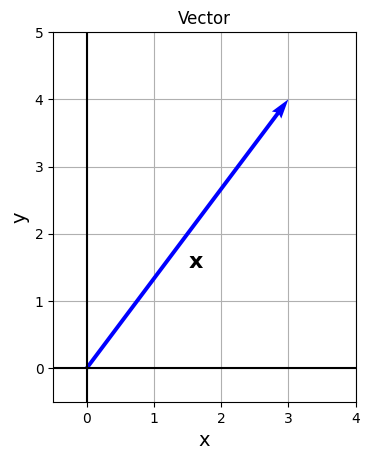

In [6]:
# plot the vector:
origin = [0], [0] # origin point
fig, ax = plt.subplots()
ax.quiver(*origin, x[0], x[1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim([-0.5,4])
ax.set_ylim([-0.5,5])
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title("Vector")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
plt.show()

In [7]:
# transformations:
# A operating on x:
Ax = A @ x
# B operating on x:
Bx = B @ x

In [8]:
Ax, Bx

(array([0.59807621, 4.96410162]), array([9, 4]))

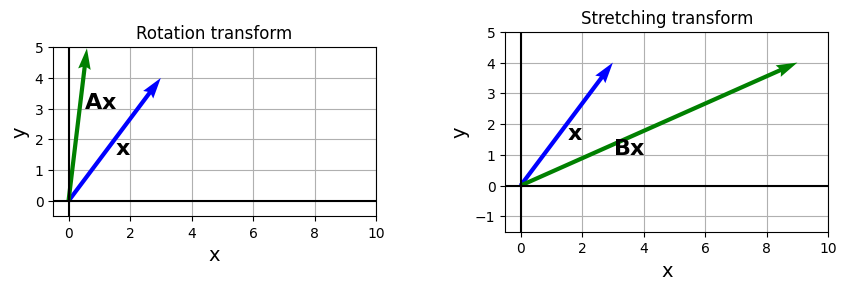

In [9]:
# plot the transformations:
# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])

origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[0,0], t1[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, t1[1,0], t1[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,10])
ax1.set_ylim([-0.5,5])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax1.text(0.5, 3, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[0,0], t2[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t2[1,0], t2[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,10])
ax2.set_ylim([-1.5,5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 1, "$\mathbf{Bx}$", fontsize=16)

plt.show()

In [10]:
# sequence of transformations:
# tnf1: A operating on x followed by B operating on the result:
y = A @ x
z = B @ y

# tnf2 : B operating on x followed by A operating on the result:
w = B @ x
v = A @ w


In [11]:
y,z,w,v

(array([0.59807621, 4.96410162]),
 array([1.79422863, 4.96410162]),
 array([9, 4]),
 array([5.79422863, 7.96410162]))

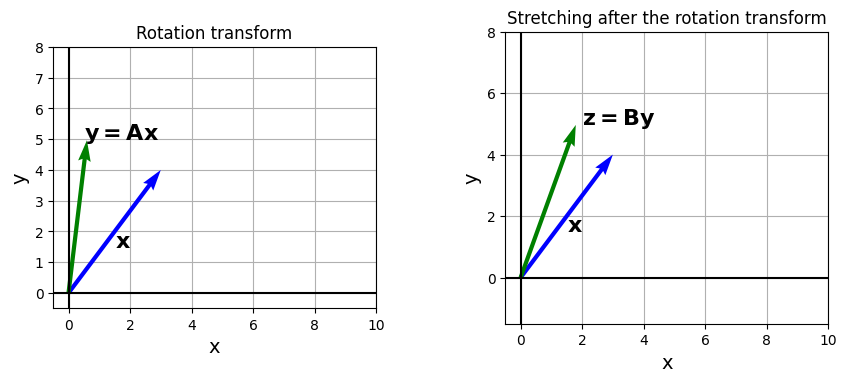

In [12]:
# plot the transformation-1:
# Reshaping and storing both x and y in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), y.reshape(1,2)])
# Reshaping and storing both x and z in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), z.reshape(1,2)])

origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting tnf1
ax1.quiver(*origin, t1[0,0], t1[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, t1[1,0], t1[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,10])
ax1.set_ylim([-0.5,8])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax1.text(0.5, 5, "$\mathbf{y=Ax}$", fontsize=16)

# Plotting tnf2
ax2.quiver(*origin, t2[0,0], t2[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t2[1,0], t2[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,10])
ax2.set_ylim([-1.5,8])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching after the rotation transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax2.text(2, 5, "$\mathbf{z=By}$", fontsize=16)

plt.show()

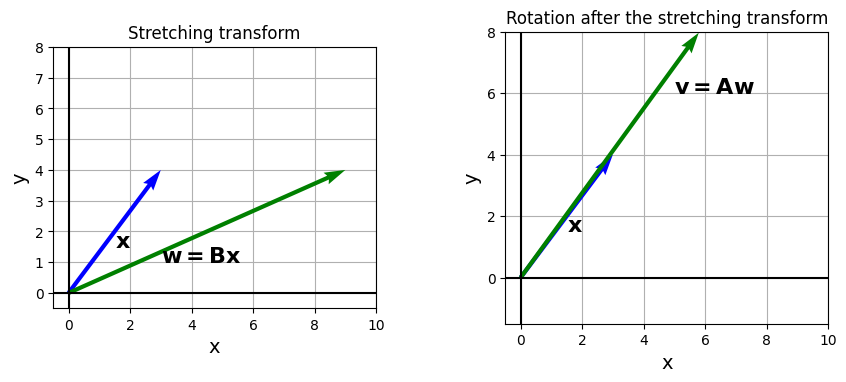

In [13]:
# plot the transformation-2:
# Reshaping and storing both w and v in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), w.reshape(1,2)])
# Reshaping and storing both x and z in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), v.reshape(1,2)])

origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting tnf1
ax1.quiver(*origin, t1[0,0], t1[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, t1[1,0], t1[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,10])
ax1.set_ylim([-0.5,8])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Stretching transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax1.text(3, 1, "$\mathbf{w=Bx}$", fontsize=16)

# Plotting tnf2
ax2.quiver(*origin, t2[0,0], t2[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t2[1,0], t2[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,10])
ax2.set_ylim([-1.5,8])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Rotation after the stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax2.text(5, 6, "$\mathbf{v=Aw}$", fontsize=16)

plt.show()

In [14]:
# matrix multiplication:
# AB operating on x:
matmul1 = A @ B
result1 = matmul1 @ x
# BA operating on x:
matmul2 = B @ A
result2 = matmul2 @ x

In [15]:
matmul1, matmul2, result1, result2

(array([[ 2.59807621, -0.5       ],
        [ 1.5       ,  0.8660254 ]]),
 array([[ 2.59807621, -1.5       ],
        [ 0.5       ,  0.8660254 ]]),
 array([5.79422863, 7.96410162]),
 array([1.79422863, 4.96410162]))

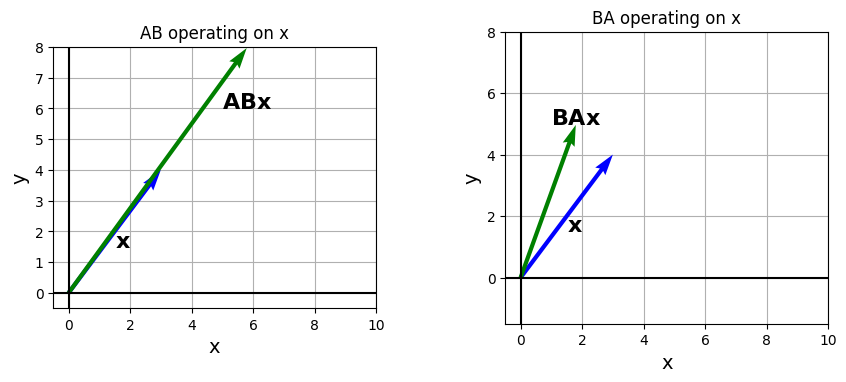

In [16]:
# plot the transformation after Matrix Multiplication:
# Reshaping and storing both w and v in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), result1.reshape(1,2)])
# Reshaping and storing both x and z in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), result2.reshape(1,2)])

origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting tnf1
ax1.quiver(*origin, t1[0,0], t1[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, t1[1,0], t1[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,10])
ax1.set_ylim([-0.5,8])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("AB operating on x")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax1.text(5, 6, "$\mathbf{ABx}$", fontsize=16)

# Plotting tnf2
ax2.quiver(*origin, t2[0,0], t2[0,1], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t2[1,0], t2[1,1], color=['g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,10])
ax2.set_ylim([-1.5,8])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("BA operating on x")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.5, 1.5, "$\mathbf{x}$", fontsize=16)
ax2.text(1, 5, "$\mathbf{BAx}$", fontsize=16)

plt.show()